In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
import time

In [2]:
def extract_index_nparray(nparray):
    index= None
    for num in nparray[0]:
        index= num
        break
    return index

In [3]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2024-01-06 06:42:27--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  53.2MB/s    in 1.1s    

2024-01-06 06:42:29 (53.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [4]:
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

In [5]:
datFile =  "/content/shape_predictor_68_face_landmarks.dat"

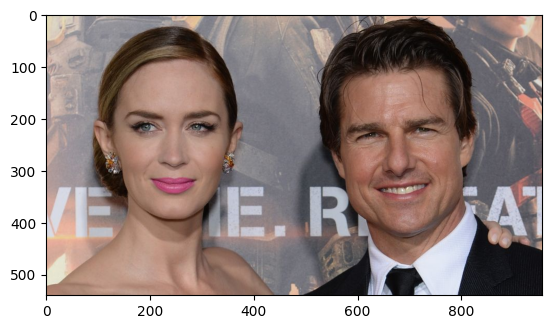

In [3]:
img= cv2.imread('/content/drive/MyDrive/images/emilytom.jpg')
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask= np.zeros_like(img_gray)
image= img.copy()



plt.imshow(img[...,::-1])


In [4]:
detector= dlib.get_frontal_face_detector()
predictor=  dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces= detector(img_gray)

for face in faces:
    print(face)

[(137, 161) (352, 376)]
[(538, 165) (796, 423)]


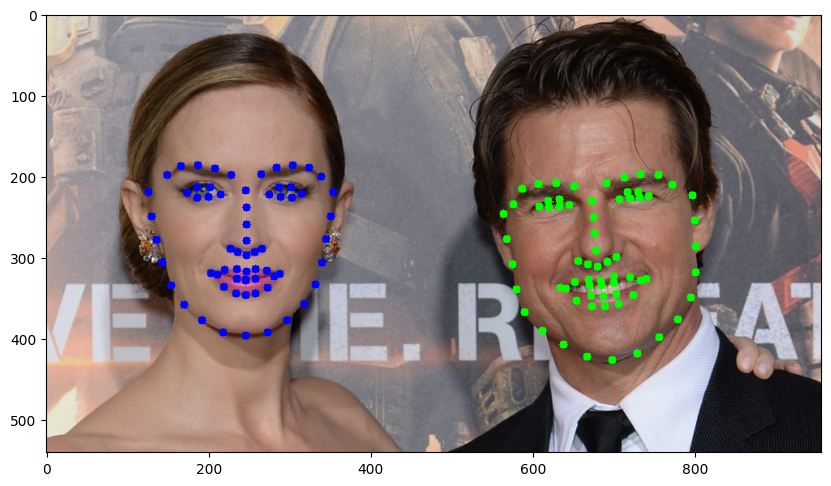

In [5]:

for face in faces:
    landmarks= predictor(img_gray, face)
    if str(face)== '[(137, 161) (352, 376)]':
      landmark_points=[]
      for n in range(0,68):
          x= landmarks.part(n).x
          y= landmarks.part(n).y
          landmark_points.append((x,y))
          cv2.circle(img, (x,y), 5, (255,0,0), -1)
    else:
      landmark_points2=[]
      for n in range(0,68):
          x= landmarks.part(n).x
          y= landmarks.part(n).y
          landmark_points2.append((x,y))
          cv2.circle(img, (x,y), 5, (0,255,0), -1)

plt.figure(figsize= [10, 6])
plt.subplot(111); plt.imshow(img[...,::-1])


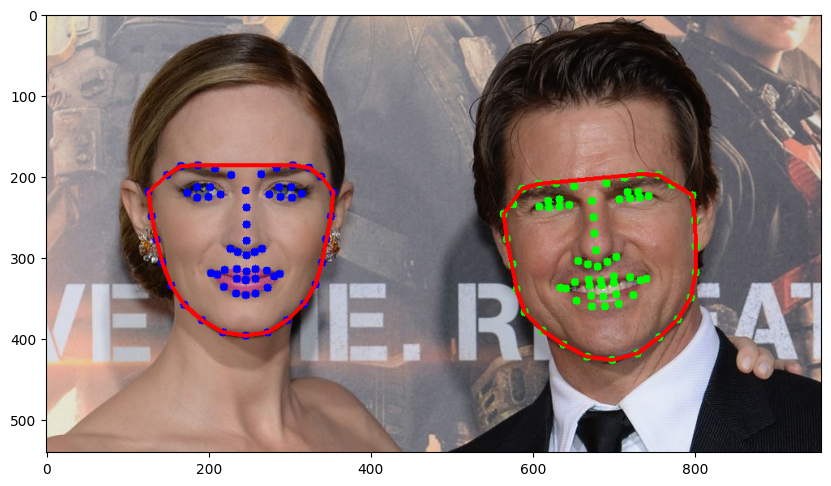

In [6]:
points= np.array(landmark_points, np.int32)
convexhull= cv2.convexHull(points)
cv2.polylines(img, [convexhull], True, (0,0,255), 3)

points2= np.array(landmark_points2, np.int32)
convexhull2= cv2.convexHull(points2)
cv2.polylines(img, [convexhull2], True, (0,0,255), 3)

plt.figure(figsize= [10, 6])
plt.subplot(111); plt.imshow(img[...,::-1])


In [32]:
print(len(landmark_points), len(landmark_points2))
print(type(landmark_points2))
print(type(landmark_points))

68 68
<class 'list'>
<class 'list'>


In [7]:
#Delaunav triangulation
rect= cv2.boundingRect(convexhull)
subdiv= cv2.Subdiv2D(rect)
subdiv.insert(landmark_points)
triangles= subdiv.getTriangleList()
triangles= np.array(triangles, dtype= np.int32)
print(len(triangles))

rect= cv2.boundingRect(convexhull2)
subdiv= cv2.Subdiv2D(rect)
subdiv.insert(landmark_points2)
triangles2= subdiv.getTriangleList()
triangles2= np.array(triangles2, dtype= np.int32)
print(len(triangles))

107
107


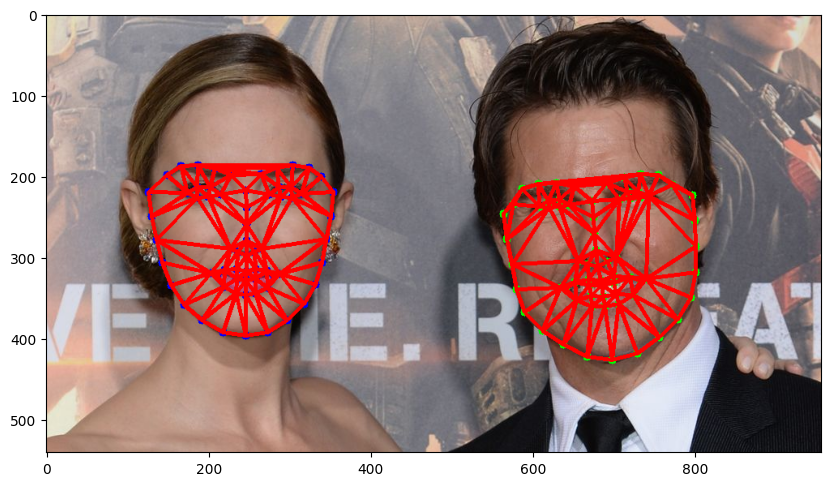

In [55]:
for t in triangles:
    pt1= (t[0], t[1])
    pt2= (t[2], t[3])
    pt3= (t[4], t[5])
    cv2.line(img, pt1, pt2, (0,0,255), 3)
    cv2.line(img, pt2, pt3, (0,0,255), 3)
    cv2.line(img, pt1, pt3, (0,0,255), 3)


for t in triangles2:
    pt12= (t[0], t[1])
    pt22= (t[2], t[3])
    pt32= (t[4], t[5])
    cv2.line(img, pt12, pt22, (0,0,255), 3)
    cv2.line(img, pt22, pt32, (0,0,255), 3)
    cv2.line(img, pt12, pt32, (0,0,255), 3)

plt.figure(figsize= [10, 6])
plt.subplot(111); plt.imshow(img[...,::-1])


In [8]:
indexes_triangles=[]
for t in triangles:
    pt1= (t[0], t[1])
    pt2= (t[2], t[3])
    pt3= (t[4], t[5])
    #print(pt3)

    index_pt1= np.where((points==pt1).all(axis=1))
    #print(index_pt1)
    index_pt1= extract_index_nparray(index_pt1)

    index_pt2= np.where((points==pt2).all(axis=1))
    index_pt2= extract_index_nparray(index_pt2)


    index_pt3= np.where((points==pt3).all(axis=1))
    index_pt3= extract_index_nparray(index_pt3)

    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
        triangle= [index_pt1, index_pt2, index_pt3]
        indexes_triangles.append(triangle)



indexes_triangles2=[]
for t in triangles2:
    pt12= (t[0], t[1])
    pt22= (t[2], t[3])
    pt32= (t[4], t[5])
    #print(pt1)

    index_pt12= np.where((points2==pt12).all(axis=1))
    index_pt12= extract_index_nparray(index_pt12)

    index_pt22= np.where((points2==pt22).all(axis=1))
    index_pt22= extract_index_nparray(index_pt22)

    index_pt32= np.where((points2==pt32).all(axis=1))
    index_pt32= extract_index_nparray(index_pt32)

    if index_pt12 is not None and index_pt22 is not None and index_pt32 is not None:
        triangle2= [index_pt12, index_pt22, index_pt32]
        indexes_triangles2.append(triangle2)

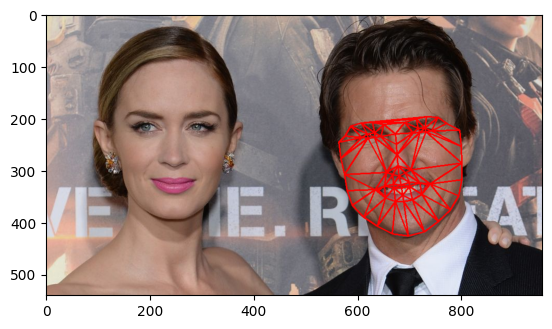

In [37]:
#triangulation of second face by first face
for triangle_index in indexes_triangles:
    #triangulation of first image
    tr1_pt1= landmark_points2[triangle_index[0]]
    tr1_pt2= landmark_points2[triangle_index[1]]
    tr1_pt3= landmark_points2[triangle_index[2]]
    #print(tr1_pt1, tr1_pt2, tr1_pt3)

    #cv2.line(image, tr1_pt1, tr1_pt2, (0,0,255),2)
    #cv2.line(image, tr1_pt3, tr1_pt2, (0,0,255),2)
    #cv2.line(image, tr1_pt1, tr1_pt3, (0,0,255),2)

#plt.imshow(image[...,::-1])

In [9]:
img= cv2.imread('/content/drive/MyDrive/images/emilytom.jpg')
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask= np.zeros_like(img_gray)
image= img.copy()
img_new_face= np.zeros_like(img)

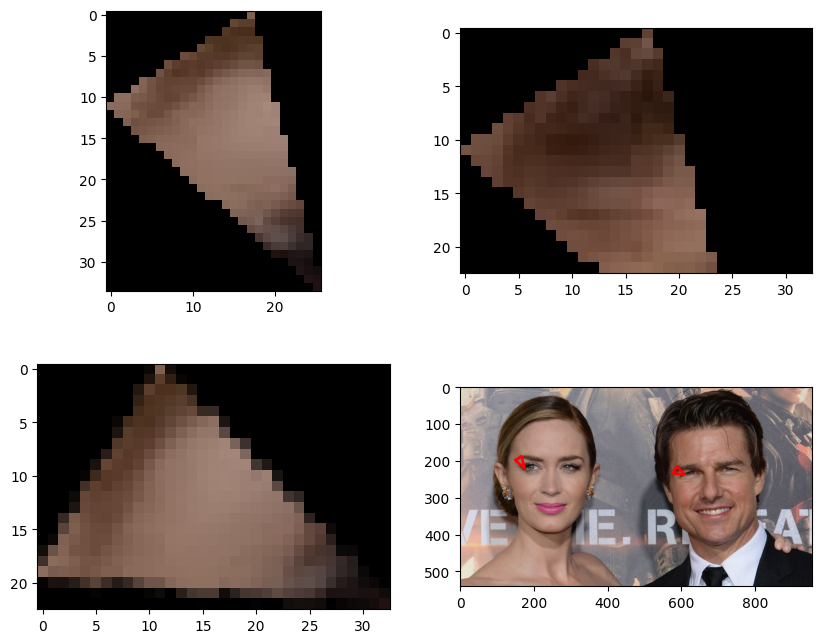

In [39]:
#both faces triangulation based on second image

for triangle_index in indexes_triangles2:
    #triangulation of first face
    tr1_pt1= landmark_points[triangle_index[0]]
    tr1_pt2= landmark_points[triangle_index[1]]
    tr1_pt3= landmark_points[triangle_index[2]]
    triangle1= np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1= cv2.boundingRect(triangle1)
    (x, y, w, h)= rect1
    cropped_triangle= img[y: y + h, x: x + w]
    cropped_tr1_mask= np.zeros((h,w), np.uint8)
    points= np.array([[tr1_pt1[0]-x, tr1_pt1[1]-y],
                     [tr1_pt2[0]-x, tr1_pt2[1]-y],
                     [tr1_pt3[0]-x, tr1_pt3[1]-y]], np.int32)

    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle= cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                      mask= cropped_tr1_mask)

    cv2.line(img, tr1_pt1, tr1_pt2, (0,0,255),5)
    cv2.line(img, tr1_pt3, tr1_pt2, (0,0,255),5)
    cv2.line(img, tr1_pt1, tr1_pt3, (0,0,255),5)


    #triangulation of second face
    tr2_pt1= landmark_points2[triangle_index[0]]
    tr2_pt2= landmark_points2[triangle_index[1]]
    tr2_pt3= landmark_points2[triangle_index[2]]
    triangle2= np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2= cv2.boundingRect(triangle2)
    (x2, y2, w2, h2)= rect2
    cropped_triangle2= img[y2:y2+h2, x2:x2+w2]
    cropped_tr2_mask= np.zeros((h2,w2), np.uint8)
    points2= np.array([[tr2_pt1[0]-x2, tr2_pt1[1]-y2],
                     [tr2_pt2[0]-x2, tr2_pt2[1]-y2],
                     [tr2_pt3[0]-x2, tr2_pt3[1]-y2]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points, 255)
    cropped_triangle2= cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                      mask= cropped_tr2_mask)

    cv2.line(img, tr2_pt1, tr2_pt2, (0,0,255),5)
    cv2.line(img, tr2_pt3, tr2_pt2, (0,0,255),5)
    cv2.line(img, tr2_pt1, tr2_pt3, (0,0,255),5)


    #warp triangles
    points= np.float32(points)
    points2= np.float32(points2)

    M= cv2.getAffineTransform(points, points2)
    #print(M)
    warped_triangle= cv2.warpAffine(cropped_triangle, M, (w2,h2))

    break

plt.figure(figsize= [10, 8])
plt.subplot(224); plt.imshow(img[...,::-1])
plt.subplot(221); plt.imshow(cropped_triangle[...,::-1])
plt.subplot(222); plt.imshow(cropped_triangle2[...,::-1])
plt.subplot(223); plt.imshow(warped_triangle[...,::-1])

In [11]:
img= cv2.imread('/content/drive/MyDrive/images/emilytom.jpg')
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask= np.zeros_like(img_gray)
image= img.copy()
img_new_face2= np.zeros_like(img)

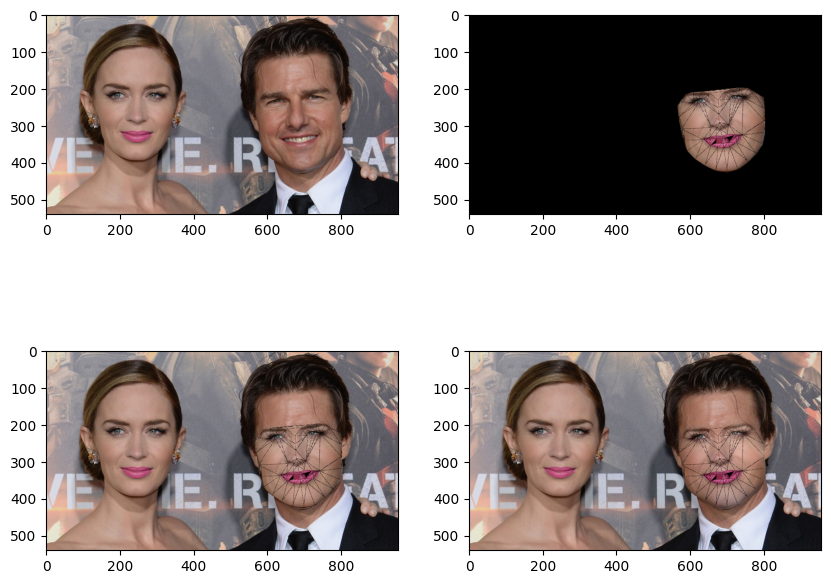

In [12]:

#both faces triangulation based on second image

for triangle_index in indexes_triangles2:
    #triangulation of first image
    tr1_pt1= landmark_points[triangle_index[0]]
    tr1_pt2= landmark_points[triangle_index[1]]
    tr1_pt3= landmark_points[triangle_index[2]]
    triangle1= np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1= cv2.boundingRect(triangle1)
    (x, y, w, h)= rect1
    cropped_triangle= img[y: y + h, x: x + w]
    cropped_tr1_mask= np.zeros((h,w), np.uint8)
    points= np.array([[tr1_pt1[0]-x, tr1_pt1[1]-y],
                     [tr1_pt2[0]-x, tr1_pt2[1]-y],
                     [tr1_pt3[0]-x, tr1_pt3[1]-y]], np.int32)

    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle= cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                      mask= cropped_tr1_mask)

    #cv2.line(img, tr1_pt1, tr1_pt2, (0,0,255),1)
    #cv2.line(img, tr1_pt3, tr1_pt2, (0,0,255),1)
    #cv2.line(img, tr1_pt1, tr1_pt3, (0,0,255),1)


    #triangulation of second image
    tr2_pt1= landmark_points2[triangle_index[0]]
    tr2_pt2= landmark_points2[triangle_index[1]]
    tr2_pt3= landmark_points2[triangle_index[2]]
    triangle2= np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2= cv2.boundingRect(triangle2)
    (x2, y2, w2, h2)= rect2
    cropped_triangle2= img[y2:y2+h2, x2:x2+w2]
    cropped_tr2_mask= np.zeros((h2,w2), np.uint8)
    points2= np.array([[tr2_pt1[0]-x2, tr2_pt1[1]-y2],
                     [tr2_pt2[0]-x2, tr2_pt2[1]-y2],
                     [tr2_pt3[0]-x2, tr2_pt3[1]-y2]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points, 255)
    cropped_triangle2= cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                      mask= cropped_tr2_mask)

    #cv2.line(img2, tr2_pt1, tr2_pt2, (0,0,255),1)
    #cv2.line(img2, tr2_pt3, tr2_pt2, (0,0,255),1)
    #cv2.line(img2, tr2_pt1, tr2_pt3, (0,0,255),1)


    #warp triangles
    points= np.float32(points)
    points2= np.float32(points2)
    M= cv2.getAffineTransform(points, points2)
    warped_triangle= cv2.warpAffine(cropped_triangle, M, (w2,h2))
    #print(warped_triangle)


    #reconstruct destination face
    img2_new_face_rect_area= img_new_face2[y2:y2+h2, x2:x2+w2]
    img2_new_face_rect_area_gray= cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    _, mask_triangles_disigned= cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle= cv2.bitwise_and(warped_triangle, warped_triangle, mask= mask_triangles_disigned)
    img2_new_face_rect_area= cv2.add(img2_new_face_rect_area, warped_triangle)
    img_new_face2[y2:y2+h2, x2:x2+w2]= img2_new_face_rect_area


    img2_face_mask= np.zeros_like(img_gray)
    img2_head_mask= cv2.fillConvexPoly(img2_face_mask, convexhull2,255)
    img2_face_mask= cv2.bitwise_not(img2_head_mask)
    img2_head_noface= cv2.bitwise_and(img, img, mask= img2_face_mask)
    result2= cv2.add(img2_head_noface, img_new_face2)

    (x2,y2,w2,h2)= cv2.boundingRect(convexhull2)
    center_face2= (int((x2+x2+w2)/2), int((y2+y2+h2)/2))
    #print(center_face2)
    seamlessclone2= cv2.seamlessClone(result2, img, img2_head_mask, center_face2, cv2.NORMAL_CLONE)


#print(new_img2_face.shape== img2.shape)
plt.figure(figsize=[10, 8])
plt.subplot(221); plt.imshow(img[...,::-1])
plt.subplot(222); plt.imshow(img_new_face2[...,::-1])

plt.subplot(223); plt.imshow(result2[...,::-1])
plt.subplot(224); plt.imshow(seamlessclone2[...,::-1])


In [13]:
img= cv2.imread('/content/drive/MyDrive/images/emilytom.jpg')
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask= np.zeros_like(img_gray)
image= img.copy()
img_new_face= np.zeros_like(img)

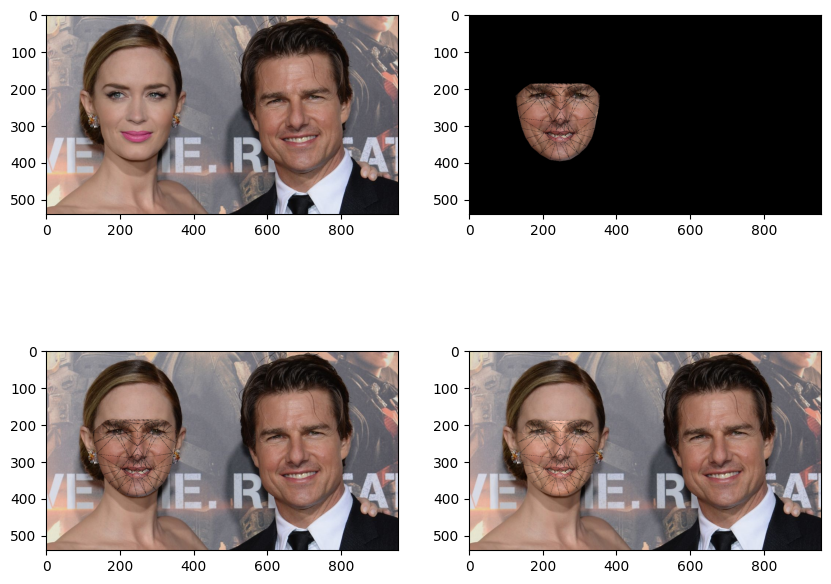

In [14]:

#both faces triangulation based on second image

for triangle_index in indexes_triangles:
    #triangulation of first image
    tr1_pt1= landmark_points[triangle_index[0]]
    tr1_pt2= landmark_points[triangle_index[1]]
    tr1_pt3= landmark_points[triangle_index[2]]
    triangle1= np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1= cv2.boundingRect(triangle1)
    (x, y, w, h)= rect1
    cropped_triangle= img[y: y + h, x: x + w]
    cropped_tr1_mask= np.zeros((h,w), np.uint8)
    points= np.array([[tr1_pt1[0]-x, tr1_pt1[1]-y],
                     [tr1_pt2[0]-x, tr1_pt2[1]-y],
                     [tr1_pt3[0]-x, tr1_pt3[1]-y]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle= cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                      mask= cropped_tr1_mask)

    #triangulation of second image
    tr2_pt1= landmark_points2[triangle_index[0]]
    tr2_pt2= landmark_points2[triangle_index[1]]
    tr2_pt3= landmark_points2[triangle_index[2]]
    triangle2= np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2= cv2.boundingRect(triangle2)
    (x2, y2, w2, h2)= rect2
    cropped_triangle2= img[y2:y2+h2, x2:x2+w2]
    cropped_tr2_mask= np.zeros((h2,w2), np.uint8)
    points2= np.array([[tr2_pt1[0]-x2, tr2_pt1[1]-y2],
                     [tr2_pt2[0]-x2, tr2_pt2[1]-y2],
                     [tr2_pt3[0]-x2, tr2_pt3[1]-y2]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2= cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                      mask= cropped_tr2_mask)



    #warp triangles
    points= np.float32(points)
    points2= np.float32(points2)
    M= cv2.getAffineTransform(points2, points)
    warped_triangle= cv2.warpAffine(cropped_triangle2, M, (w,h)) ####
    #print(warped_triangle)

    #reconstruct destination face

    img_new_face_rect_area= img_new_face[y:y+h, x:x+w]
    img_new_face_rect_area_gray= cv2.cvtColor(img_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    _, mask_triangles_disigned= cv2.threshold(img_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle= cv2.bitwise_and(warped_triangle, warped_triangle, mask= mask_triangles_disigned)
    img_new_face_rect_area= cv2.add(img_new_face_rect_area, warped_triangle)
    img_new_face[y:y+h, x:x+w]= img_new_face_rect_area

    img_face_mask= np.zeros_like(img_gray)
    img_head_mask= cv2.fillConvexPoly(img_face_mask, convexhull,255)
    img_face_mask= cv2.bitwise_not(img_head_mask)
    img_head_noface= cv2.bitwise_and(img, img, mask= img_face_mask)
    result= cv2.add(img_head_noface, img_new_face)

    (x,y,w,h)= cv2.boundingRect(convexhull)
    center_face= (int((x+x+w)/2), int((y+y+h)/2))
    seamlessclone= cv2.seamlessClone(result, img, img_head_mask, center_face, cv2.NORMAL_CLONE)


#print(new_img2_face.shape== img2.shape)
plt.figure(figsize=[10, 8])
plt.subplot(221); plt.imshow(img[...,::-1])
plt.subplot(222); plt.imshow(img_new_face[...,::-1])

plt.subplot(223); plt.imshow(result[...,::-1])
plt.subplot(224); plt.imshow(seamlessclone[...,::-1])


Text(0.5, 1.0, 'Swapped Faces')

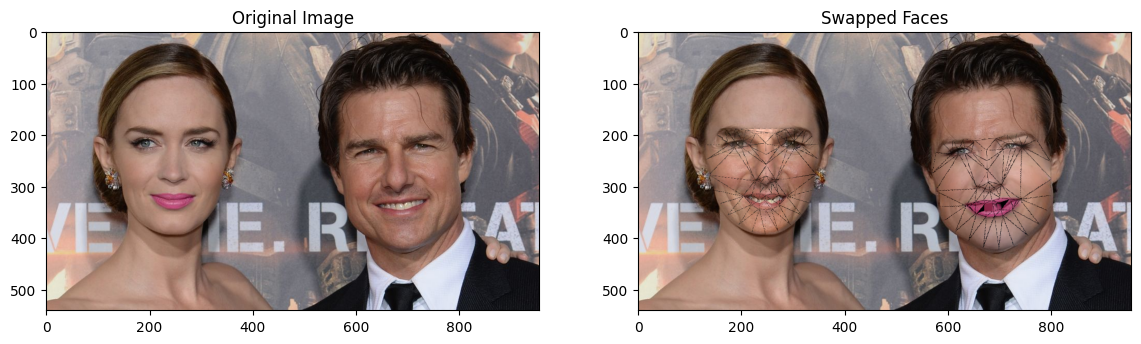

In [21]:
final= cv2.seamlessClone(seamlessclone, seamlessclone2, img_head_mask, center_face, cv2.NORMAL_CLONE)

plt.figure(figsize=[14, 8])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Original Image')
plt.subplot(122); plt.imshow(final[...,::-1]); plt.title('Swapped Faces')
